<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/Kaggle%E8%B3%87%E6%96%99%E9%9B%86_%E5%85%B1%E4%BA%AB%E5%96%AE%E8%BB%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#使用回歸決策數預測各個時段單車租借數
r2score:0.814

In [264]:
# 引入資料集並轉成dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("train.csv",encoding="utf-8")
df = pd.DataFrame(data, columns=data.keys())
print("總共資料筆數:",df.shape[0])
df.head()

總共資料筆數: 10886


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [265]:
# 檢查是否有缺失值
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [266]:
# 此資料集基本資訊
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [267]:
# 描述行統計資料
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [268]:
# 資料預處理
# 將datetime資料分成年月日
# drop掉原來datetime欄位

def get_year(x):
  year = int(x.split()[0].split("-")[0])
  return year

def get_hour(x):
  hour = int(x.split()[1].split(":")[0])
  return hour

def get_date(x):
  date = int(x.split()[0].split("-")[2])
  return date

def get_month(x):
  month = int(x.split()[0].split("-")[1])
  return month

df["year"] = df["datetime"].apply(get_year)
df["month"] = df["datetime"].apply(get_month)
df["date"] = df["datetime"].apply(get_date)
df["hour"] = df["datetime"].apply(get_hour)
df_process = df.drop(["atemp","casual","registered","datetime"], axis=1)
df_process

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,date,hour
0,1,0,0,1,9.84,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,61,6.0032,129,2012,12,19,22


In [269]:
# 將資料轉成相關係數
correlation_matrix = df_process.corr().round(2)
correlation_matrix

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,date,hour
season,1.00,0.03,-0.01,0.01,0.26,0.19,-0.15,0.16,-0.00,0.97,0.00,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,0.00,0.01,-0.01,0.01,0.00,-0.02,-0.00
workingday,-0.01,-0.25,1.00,0.03,0.03,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.00
weather,0.01,-0.01,0.03,1.00,-0.06,0.41,0.01,-0.13,-0.01,0.01,-0.01,-0.02
temp,0.26,0.00,0.03,-0.06,1.00,-0.06,-0.02,0.39,0.06,0.26,0.02,0.15
humidity,0.19,0.00,-0.01,0.41,-0.06,1.00,-0.32,-0.32,-0.08,0.20,-0.01,-0.28
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.32,1.00,0.10,-0.02,-0.15,0.04,0.15
count,0.16,-0.01,0.01,-0.13,0.39,-0.32,0.10,1.00,0.26,0.17,0.02,0.40
year,-0.00,0.01,-0.00,-0.01,0.06,-0.08,-0.02,0.26,1.00,-0.00,0.00,-0.00
month,0.97,0.00,-0.00,0.01,0.26,0.20,-0.15,0.17,-0.00,1.00,0.00,-0.01


<Axes: >

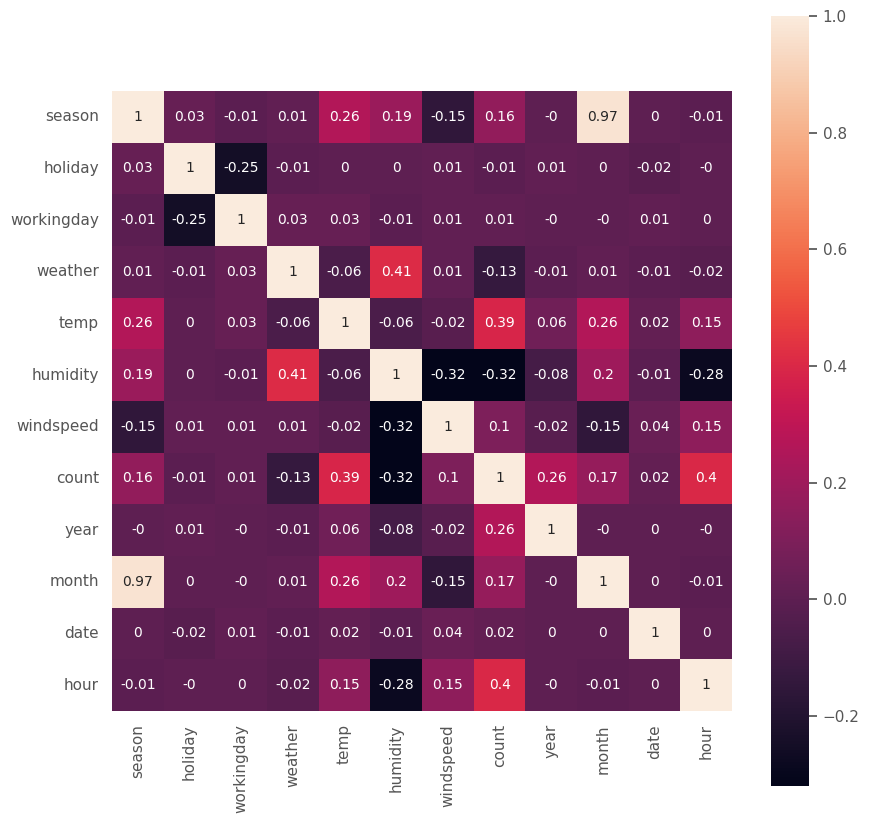

In [270]:
# 將相關係數用熱力圖畫出來
sns.heatmap(correlation_matrix, annot=True, square=True)

In [271]:
# 將資料標準化
# 切分訓練集 測試集
import numpy as np
x = df_train.drop(["count"], axis=1)
y = df_train['count']

x = np.array(x)
y = np.array(y)

In [272]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [273]:
# 檢查資料筆數是否相同
x_train.shape, y_train.shape

((8708, 11), (8708,))

In [274]:
x_test.shape, y_test.shape

((2178, 11), (2178,))

In [275]:
# 建立回歸樹模型
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [276]:
pre = reg.predict(x_test)
print(type(pre))
pre = pre.astype(int)

<class 'numpy.ndarray'>


In [277]:
print("預測結果:",list(pre))
print("正確結果:",list(y_test))

預測結果: [141, 59, 157, 205, 153, 87, 135, 472, 691, 103, 11, 54, 226, 53, 157, 7, 75, 72, 167, 6, 57, 169, 9, 218, 2, 2, 78, 20, 30, 16, 554, 135, 227, 713, 365, 5, 185, 566, 306, 622, 129, 209, 11, 384, 188, 14, 7, 432, 134, 45, 113, 232, 520, 168, 968, 431, 90, 1, 144, 216, 360, 561, 370, 731, 153, 380, 38, 6, 13, 150, 3, 312, 3, 140, 479, 211, 213, 51, 33, 172, 680, 515, 305, 338, 320, 4, 343, 376, 11, 204, 109, 351, 8, 63, 3, 313, 165, 137, 240, 2, 19, 943, 11, 744, 370, 160, 349, 169, 84, 304, 37, 87, 29, 178, 590, 53, 92, 248, 67, 7, 98, 37, 46, 190, 818, 241, 100, 129, 495, 216, 565, 1, 171, 89, 263, 770, 193, 5, 180, 233, 117, 50, 127, 684, 596, 533, 26, 63, 190, 4, 52, 537, 168, 57, 405, 259, 161, 164, 32, 173, 25, 69, 825, 354, 227, 326, 632, 194, 104, 5, 199, 70, 56, 531, 6, 4, 228, 233, 6, 71, 585, 168, 3, 48, 67, 495, 120, 292, 482, 185, 146, 6, 5, 88, 83, 301, 341, 258, 463, 538, 4, 332, 188, 18, 4, 166, 7, 180, 357, 72, 1, 154, 185, 190, 88, 367, 385, 28, 101, 108, 117, 54

In [278]:
# 使用r2-sqaure評估預測結果 1:最好 0.5:瞎猜也會對一半機率
from sklearn.metrics import r2_score
r2_score(y_test, pre)

0.8948038390272486

In [279]:
# 使用RMSLE評估預測結果
# 特性:對於少預測的數量懲罰大
# 符合單車預先部署量不足導致滿意度下降的懲罰
from sklearn.metrics import mean_squared_log_error
print('RMSLE: ', mean_squared_log_error(y_test, pre, squared=False))

RMSLE:  0.445329255407201


In [280]:
# 交叉驗證
from sklearn.model_selection import cross_val_score
reg = DecisionTreeRegressor()
scores = cross_val_score(reg, x, y, scoring="r2", cv=10, n_jobs=-1)
print("10:", scores)
print("average:", np.average(scores))

10: [0.37689986 0.63696581 0.84680242 0.80571315 0.69839565 0.51301081
 0.73951055 0.84931742 0.84425641 0.69206603]
average: 0.7002938113949995


In [281]:
# 提交結果給kaggle
result = pd.DataFrame({"datetime":df["datetime"][8708:],"count":pre})
result.to_csv("bike.csv", encoding="utf-8", index=False)

#詳細數據資料視覺化

In [282]:
import numpy as np
import pandas as pd

trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")
trainDF.shape,testDF.shape

((10886, 12), (6493, 9))

<ipython-input-283-83039848adab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['count'])


<Axes: xlabel='count', ylabel='Density'>

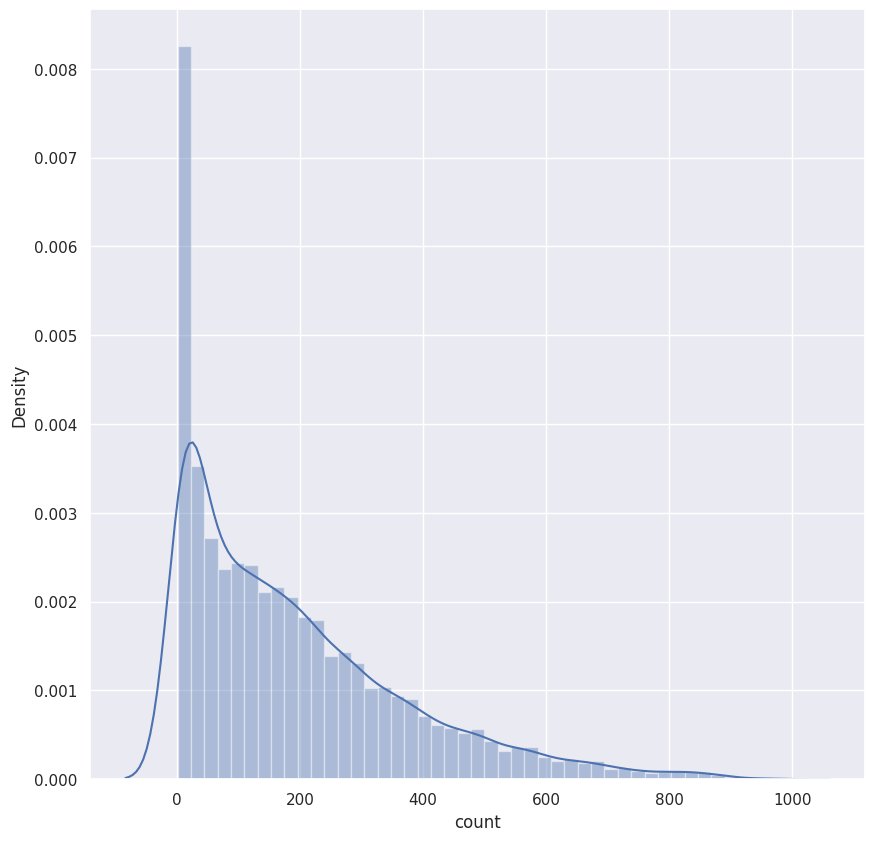

In [283]:
#先觀察租借數量資料分布型態
sns.set(rc={"figure.figsize":(10,10)})
sns.distplot(data['count'])

In [284]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [285]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [286]:
# 查看數據集描述性的統計訊息
trainDF.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [287]:
trainDF.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

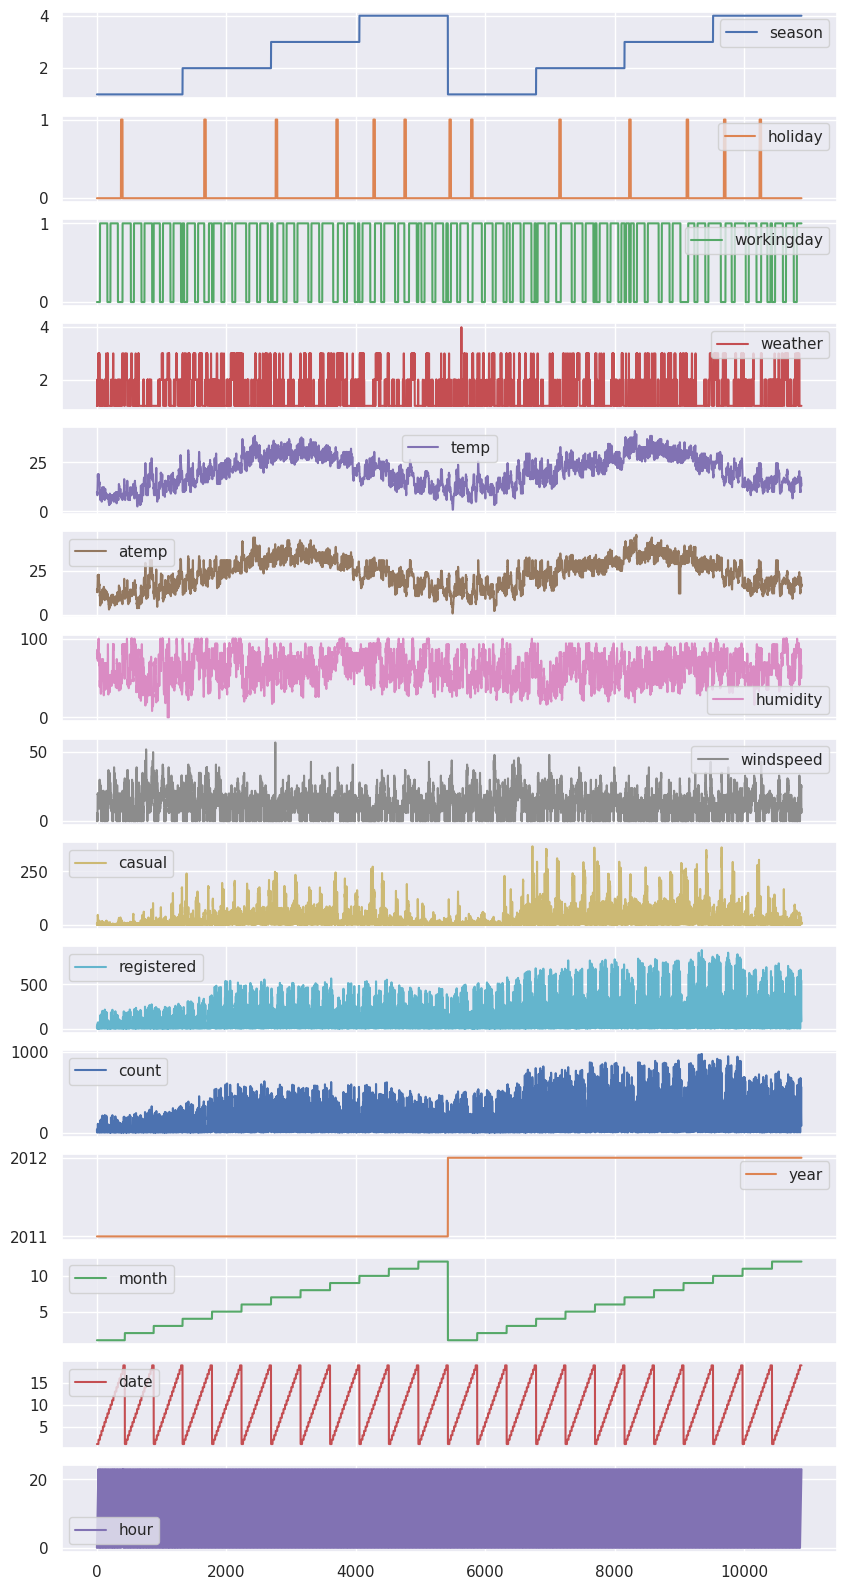

In [288]:
data.plot(subplots=True, figsize=(10,20))

datetime（日期）
- hourly date + timestamp

season（季節）
- 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday（是否為假日）
- whether the day is considered a holiday

workingday（是否為工作日）
- whether the day is neither a weekend nor holiday

weather（天氣狀況）
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp（室外溫度）
- temperature in Celsius

atemp（體感溫度）
- "feels like" temperature in Celsius

humidity（濕度）
- relative humidity

windspeed（風速）
- wind speed

casual（未註冊用戶租車數）
- number of non-registered user rentals initiated

registered（註冊用戶租車數）
- number of registered user rentals initiated

count（總租車數）
- number of total rentals

#分析:
###訓練數據集10886筆沒有缺失數據 完整性佳
###除了datetime欄位為類別型態資料 其餘皆是數值類型
###對比訓練集跟測試集 少了"casual","registered","count"

In [289]:
# 數據資料清洗
# 特徵值提取 使用map()函數
bikedf = pd.DataFrame(data=trainDF, columns=trainDF.keys())

# 獲取日期
def getdate(x):
  return x.split()[0]

bikedf["date"] = trainDF.datetime.map(getdate)

# 獲取年份
def get_year(x):
    year = int(x.split('-')[0])
    return year
bikedf['year'] = bikedf['date'].map(get_year)

# 獲取月份
def get_month(x):
    month = int(x.split('-')[1])
    return month
bikedf['month'] = bikedf['date'].map(get_month)

# 獲取天
def get_day(x):
    day = int(x.split('-')[2])
    return day
bikedf['day'] = bikedf['date'].map(get_day)

# 獲取小時
def get_hour(x):
    time = x.split()[1]
    hour = int(time.split(':')[0])
    return hour
bikedf['hour'] = trainDF.datetime.map(get_hour)

import datetime as dt
# 獲取每月第幾周
def get_weekday(x):
    dateDT = dt.datetime.strptime(x,'%Y-%m-%d')
    week_day = dateDT.weekday()
    return week_day
bikedf['weekday'] = bikedf['date'].map(get_weekday)

# #合併為新的數據集BikeDf
# bikedf = pd.concat([trainDF.iloc[:,1:],bikedf.iloc[:,1:]],axis=1)

In [290]:
# 樞紐分析
# df.pivot(index, columns, values)
# 看出每日每時段租車數量
xxx = bikedf.pivot("date","hour","count")
xxx.head()

<ipython-input-290-5790b867dac4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  xxx = bikedf.pivot("date","hour","count")


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,16.0,40.0,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,...,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0
2011-01-02,17.0,17.0,9.0,6.0,3.0,NaN,2.0,1.0,8.0,20.0,...,59.0,74.0,76.0,65.0,53.0,30.0,22.0,31.0,9.0,8.0
2011-01-03,5.0,2.0,NaN,NaN,1.0,3.0,30.0,64.0,154.0,88.0,...,77.0,72.0,76.0,157.0,157.0,110.0,52.0,52.0,20.0,12.0
2011-01-04,5.0,2.0,1.0,NaN,2.0,4.0,36.0,94.0,179.0,100.0,...,63.0,65.0,83.0,212.0,182.0,112.0,54.0,48.0,35.0,11.0
2011-01-05,6.0,6.0,2.0,NaN,2.0,3.0,33.0,88.0,195.0,115.0,...,62.0,62.0,89.0,190.0,169.0,132.0,89.0,43.0,42.0,19.0


In [291]:
# 相關性分析
correlation = bikedf.corr().round(2)
correlation.head()

<ipython-input-291-bfbae7fdd061>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bikedf.corr().round(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16,-0.00,0.97,0.00,-0.01,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01,0.01,0.00,-0.02,-0.00,-0.19
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01,-0.00,-0.00,0.01,0.00,-0.70
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13,-0.01,0.01,-0.01,-0.02,-0.05
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.06,0.26,0.02,0.15,-0.04


<Axes: >

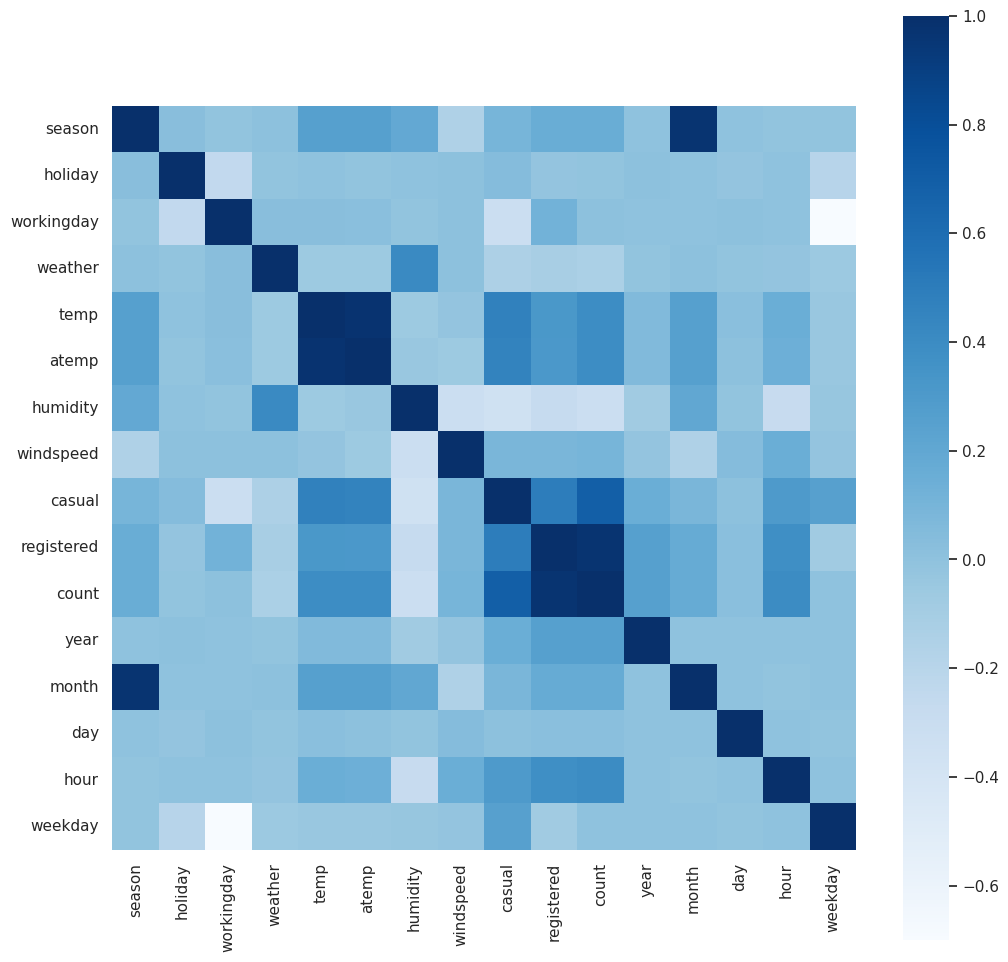

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
# vmax設定色塊最大區分值
sns.heatmap(correlation, annot=False, cmap="Blues", square=True, vmax=1)

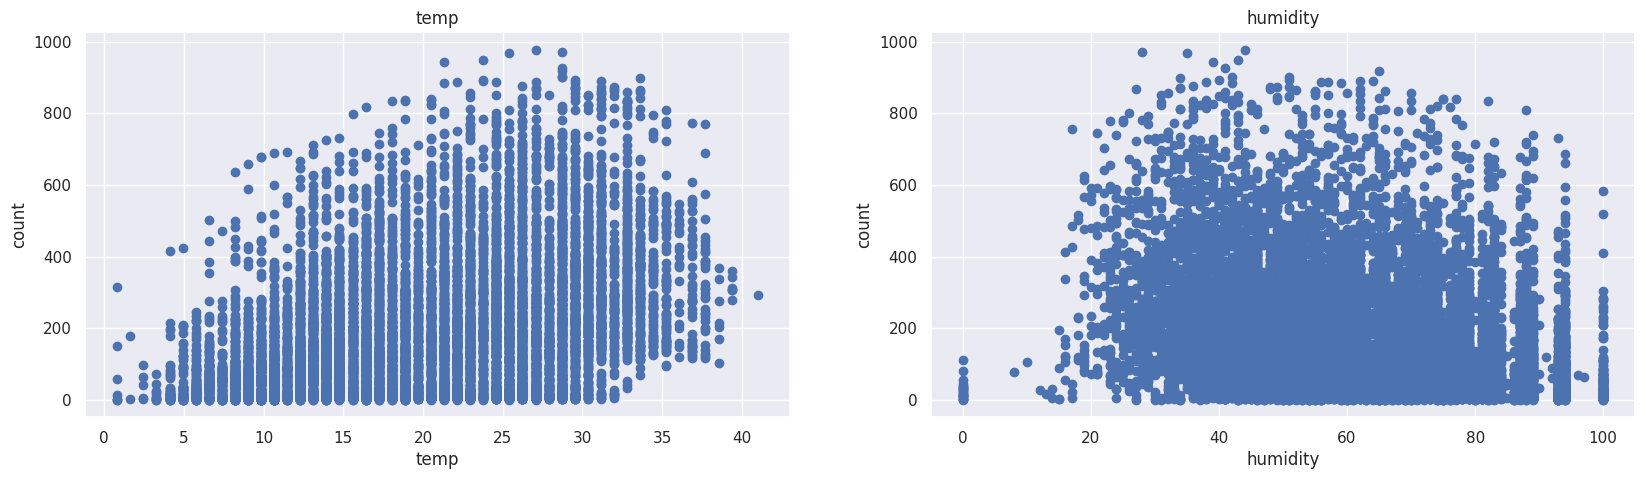

In [293]:
# 將溫度及濕度對於租借數量的相關性以散點圖呈現
# 設置圖的大小
plt.figure(figsize=(20,5))
feature = ["temp","humidity"]
target = df["count"]
# 繪製圖
for i, col in enumerate(feature):
  plt.subplot(1, len(feature), i+1)
  x = df[col]
  y = target
  plt.scatter(x, y, marker="o")
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("count")

#從相關係數圖中可以看出:
###租車總數與氣溫和濕度成正負相關 是影響用戶租車意願的特徵
###未註冊用戶跟已註冊用戶呈現強正相關 代表用戶越多 租車需求越多

In [294]:
BikeDf = bikedf

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Workingday'),
 Text(0.5, 1.0, 'box plot on count across workingday')]

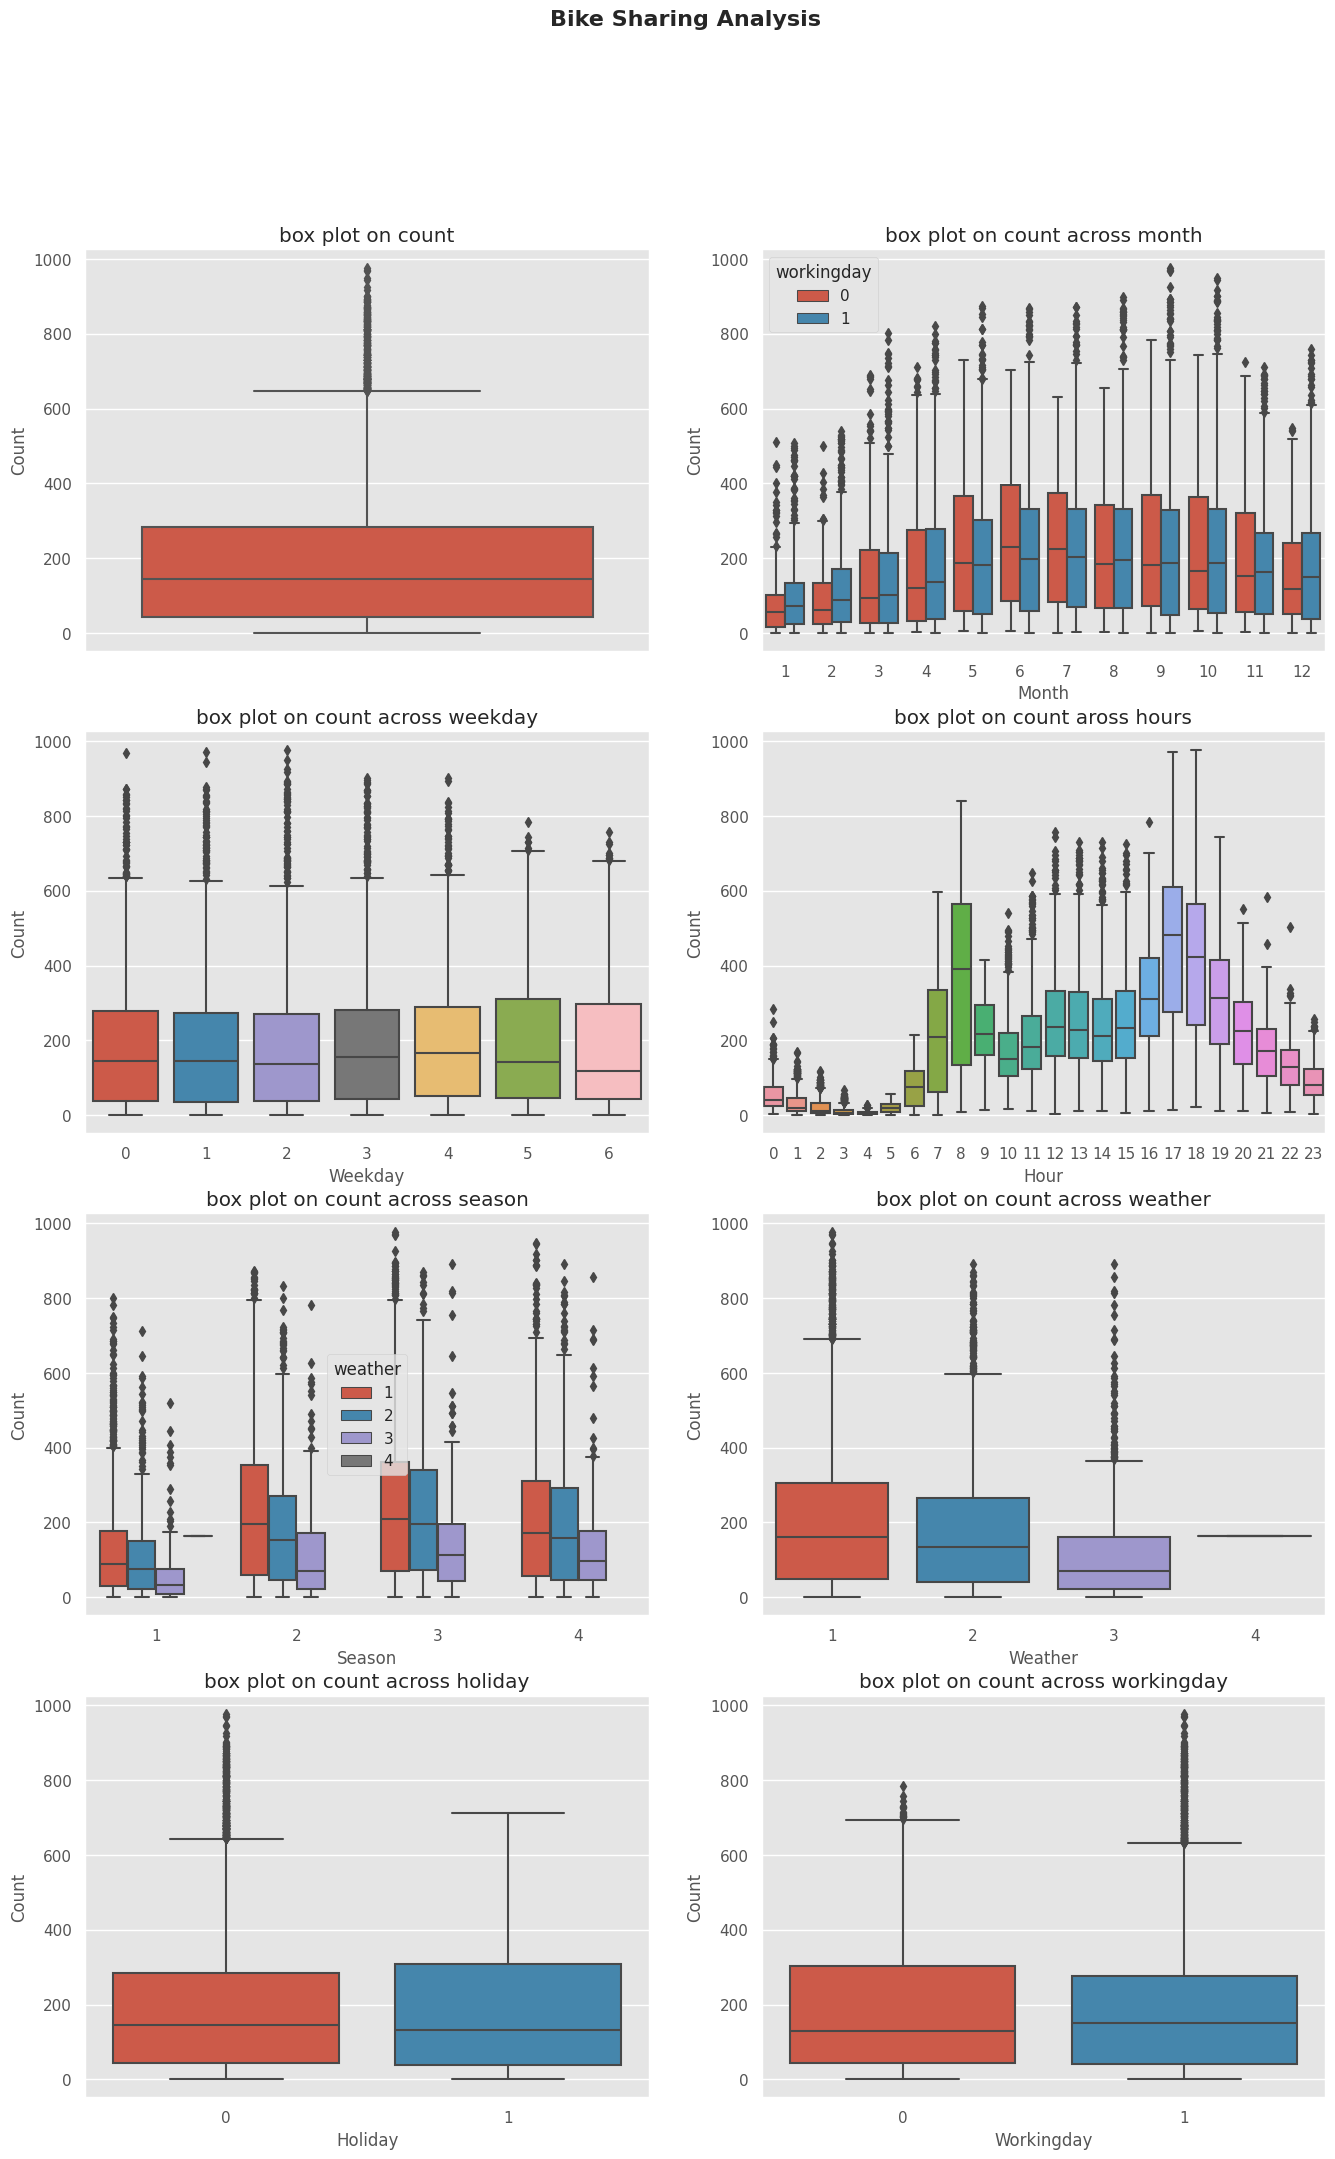

In [295]:
# 先設置圖片總大小
plt.style.use("ggplot")
fig=plt.figure(figsize=(16,24))

# 設置大標題
fig.suptitle("Bike Sharing Analysis",fontsize=16,fontweight="bold")
'''
subplot()方法裡面傳入三個數字
前兩個數字代表要生成幾行幾列的子圖,第三個數字代表子圖位置
subplot(4,2,1)生成一個4列2行的第一張子圖
'''
# 第一個子圖 統計租車人數
ax1=fig.add_subplot(4,2,1)
sns.boxplot(data=BikeDf,y="count")
ax1.set(ylabel='Count',title='box plot on count')

# 第二個子圖 統計每月在工作日和非工作日的租車人數
ax2=fig.add_subplot(4,2,2)
sns.boxplot(data=BikeDf,x="month",y="count",hue="workingday")
ax2.set(ylabel="Count",xlabel="Month",title="box plot on count across month")

# 第三個子圖 統計每個星期的租車人數
ax3=fig.add_subplot(4,2,3)
sns.boxplot(data=BikeDf,x="weekday",y="count")
ax3.set(ylabel="Count",xlabel="Weekday",title="box plot on count across weekday")

# 第四個子圖 統計每個小時的租車人數
ax4=fig.add_subplot(4,2,4)
sns.boxplot(data=BikeDf,x="hour",y='count')
# plt.title("box plot on count")
# plt.ylabel("Count")
ax4.set(ylabel="Count",xlabel="Hour",title="box plot on count aross hours")

# 第五個子圖 統計每個季節不同天氣下的租車人數
ax5=fig.add_subplot(4,2,5)
sns.boxplot(data=BikeDf,x="season",y="count",hue="weather")
ax5.set(ylabel="Count",xlabel="Season",title="box plot on count across season")

# 第六個子圖 統計不同天氣下的租車人數
ax6=fig.add_subplot(4,2,6)
sns.boxplot(data=BikeDf,x="weather",y="count")
ax6.set(ylabel="Count",xlabel="Weather",title="box plot on count across weather")

# 第七個子圖 統計假日和非假日的租車人數
ax7=fig.add_subplot(4,2,7)
sns.boxplot(data=BikeDf,x="holiday",y="count")
ax7.set(ylabel="Count",xlabel="Holiday",title="box plot on count across holiday")

# 第八個子圖 統計工作日和非工作日的租車人數
ax8=fig.add_subplot(4,2,8)
sns.boxplot(data=BikeDf,x="workingday",y="count")
ax8.set(ylabel="Count",xlabel="Workingday",title="box plot on count across workingday")

In [303]:
BikeDf['humidity_band'] = pd.cut(BikeDf['humidity'],5)
BikeDf['windspeed_band'] = pd.cut(BikeDf['windspeed'],5)
BikeDf['temp_band'] = pd.cut(BikeDf["temp"],5)
# 將季節1234對應到春夏秋冬（使用映射函數.map）
BikeDf["season_word"] = BikeDf["season"].map({1:"Spring",2:"Summer",3:"Autumn",4:"Winter"})

BikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,day,hour,weekday,humidity_band,windspeed_band,season_word,workingday_word,weather_word,temp_band
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,1,0,5,"(80.0, 100.0]","(-0.057, 11.399]",Spring,holiday,sunny,"(8.856, 16.892]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,1,5,"(60.0, 80.0]","(-0.057, 11.399]",Spring,holiday,sunny,"(8.856, 16.892]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,1,2,5,"(60.0, 80.0]","(-0.057, 11.399]",Spring,holiday,sunny,"(8.856, 16.892]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,1,3,5,"(60.0, 80.0]","(-0.057, 11.399]",Spring,holiday,sunny,"(8.856, 16.892]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,1,4,5,"(60.0, 80.0]","(-0.057, 11.399]",Spring,holiday,sunny,"(8.856, 16.892]"


In [304]:
BikeDf.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'weekday', 'humidity_band',
       'windspeed_band', 'season_word', 'workingday_word', 'weather_word',
       'temp_band'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 33.2656249999998, 'outdoor temp')

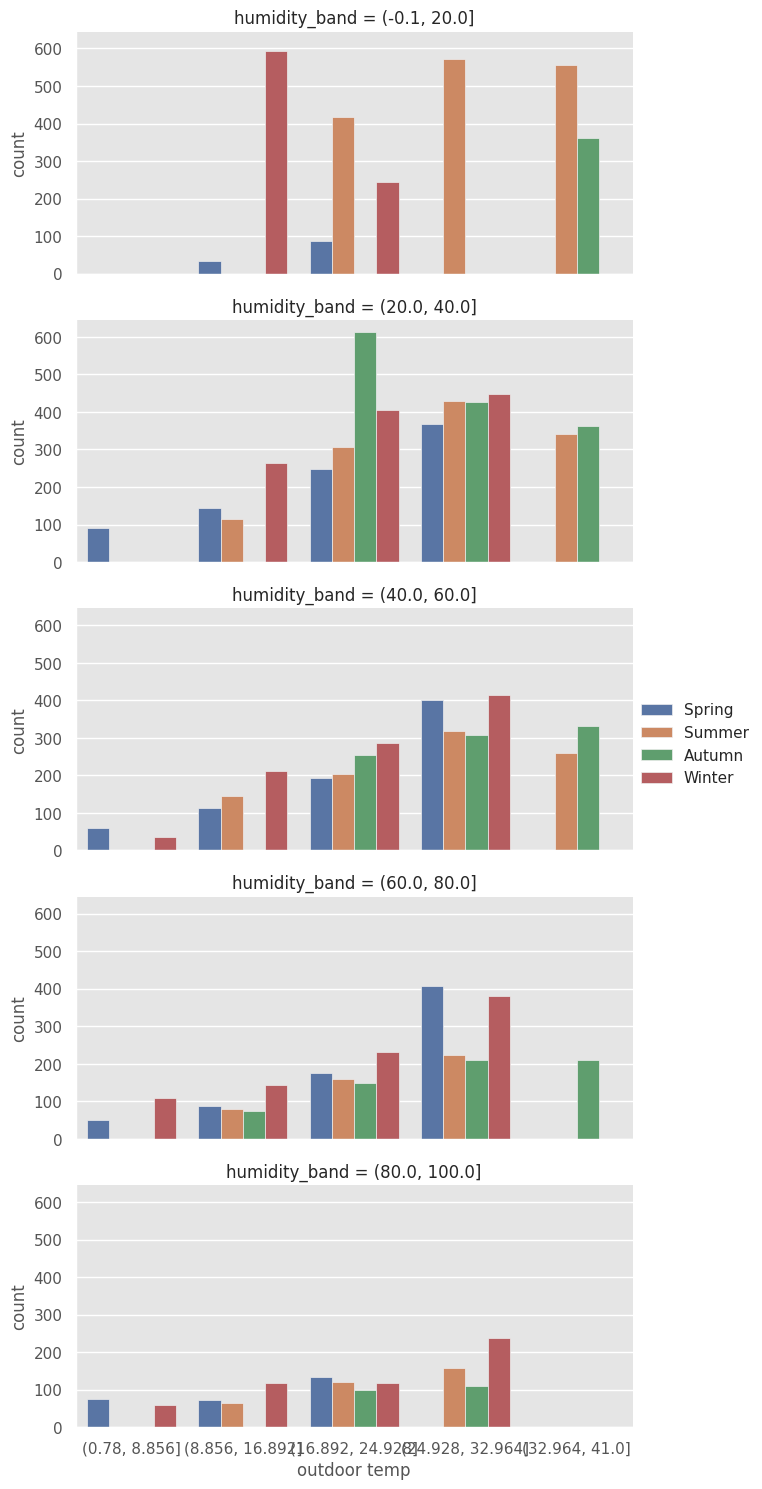

In [307]:
sns.FacetGrid(data=BikeDf, row="humidity_band", aspect=2.2).\
map(sns.barplot,"temp_band","count","season_word",hue_order=["Spring","Summer","Autumn","Winter"],palette="deep",errorbar=None).\
add_legend()
# X軸的刻度顯示 rotation：旋轉角度
plt.xticks(rotation=0)
plt.xlabel('outdoor temp')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


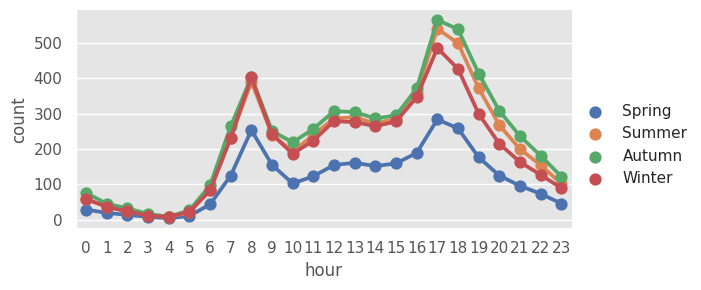

In [298]:
# 不同季節下 每小時平均租車狀況
plt.style.use("ggplot")

sns.FacetGrid(data=BikeDf,aspect=2).map(sns.pointplot,"hour","count","season_word",hue_order=["Spring","Summer","Autumn","Winter"],palette="deep",errorbar=None).add_legend()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


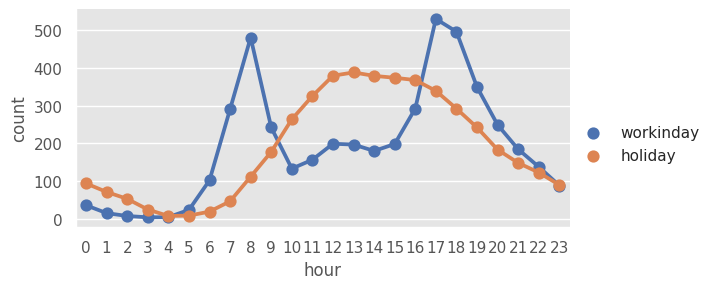

In [299]:
# 工作日與假日 每小時租車狀況
BikeDf['workingday_word'] = BikeDf['workingday'].map({1:'workinday',0:'holiday'})

sns.FacetGrid(data=BikeDf,aspect=2).\
map(sns.pointplot,"hour","count","workingday_word",hue_order=['workinday','holiday'],palette="deep",errorbar=None).\
add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


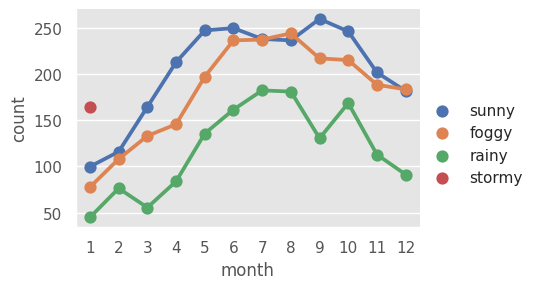

In [300]:
# 不同天氣狀況下 各月份
BikeDf['weather_word'] = BikeDf['weather'].map({1:'sunny',2:'foggy',3:'rainy',4:'stormy'})

# 數據透視表呈現
BikeDf[["count","month","weather_word"]].pivot_table(values="count",index="month",columns="weather_word",aggfunc="mean")

sns.FacetGrid(data=BikeDf,aspect=1.5).\
map(sns.pointplot,"month","count","weather_word",hue_order=['sunny','foggy','rainy','stormy'],palette="deep",errorbar=None).\
add_legend()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


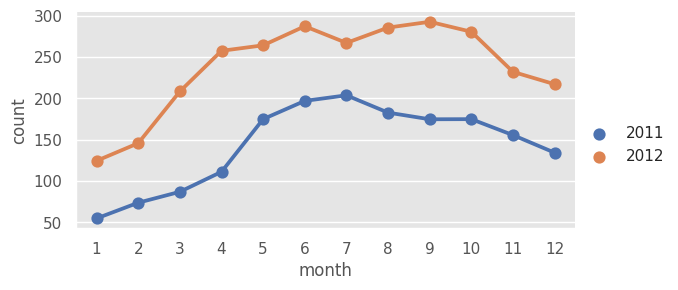

In [301]:
# 不同年 各個月份租車數量
# 可以看出有租借量有成長
sns.FacetGrid(data=BikeDf,aspect=2).\
map(sns.pointplot,"month","count","year",hue_order=[2011,2012],palette="deep",errorbar=None).\
add_legend()